<h1>Heart Disease Diagnostic Analysis
<h1>


<p>Domain : Health Care

<h3>Overview:</h3>
<p>This project focuses on performing diagnostic analysis for heart disease using machine learning techniques applied to medical data. The goal is to develop a predictive model that can accurately classify patients based on their health attributes and diagnostic test results, thereby assisting healthcare professionals in early detection and intervention.
<h3>Tools and Technologies:</h3>
<ul>
<li>Language: Python
<li>Libraries: Pandas, NumPy,Matplotlib, Seaborn
<li>Environment: Jupyter Notebook
</ul>
<h3>Deliverables:</h3>
<ul>
<li>Jupyter Notebook with code and explanations.
<li>Visualizations showcasing segmentation and insights.
<li>Concise report summarizing analysis and recommendations.
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Assets\Heart Disease Diagnostic Analysis\Heart Disease data.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<h3>Features</h3>
<p>
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
</p>

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<P>There is no Missing Values in the given Data Set<p>

<h2>Percentage of People having Heart Disease<h2>

In [5]:
num=data.groupby('target').size()
num

target
0    499
1    526
dtype: int64

In [6]:
#Converting Numerical Data into the Categorical Data
def heart_disease(row):
    if row==0:
        return "Absent"
    elif row==1:
        return "Present"

In [7]:
#Applying converted data into our dataset with a new column called Heart Disease
data["Heart_Disease"]=data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent


In [8]:
dis=data.groupby('Heart_Disease')['target'].count()
dis

Heart_Disease
Absent     499
Present    526
Name: target, dtype: int64

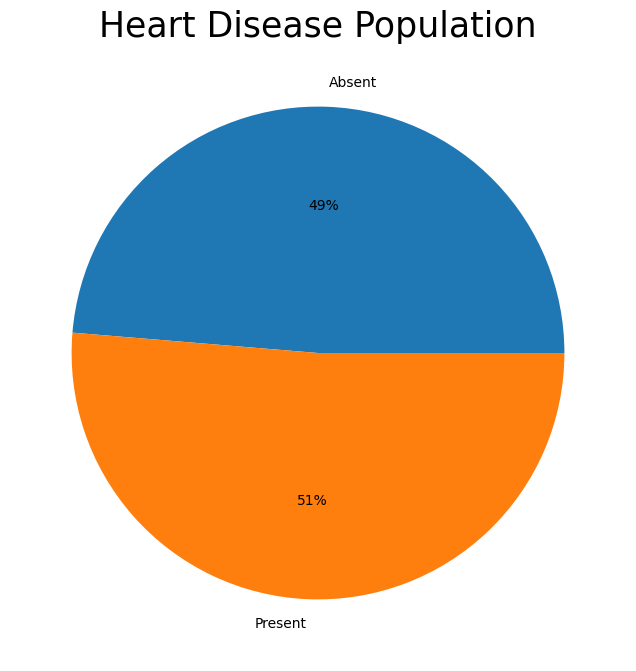

In [9]:
plt.figure(figsize=(10,8))
plt.pie(dis,labels=['Absent','Present'],autopct='%0.00f%%')
plt.title("Heart Disease Population",fontsize=25)
plt.show()

<p>From the above pie chart we can say that 51% people are having Heart Diseases,remaining 49% people are having good health(i.e Absence of Heart Disease)<p>

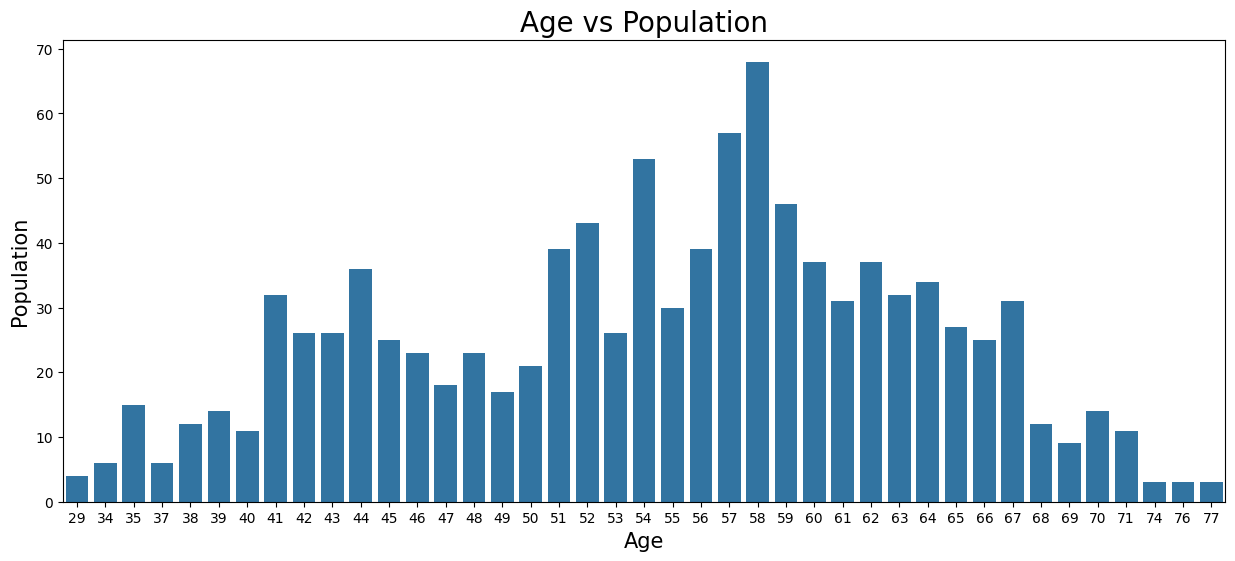

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data=data)
plt.title("Age vs Population",fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.show()

<h4>-->The age of 58 have more Heart Diseases</h4>

In [11]:
#categorical Analysis
young_ages=data[(data['age']>=29)& (data['age']<40)]
middle_ages=data[(data['age']>=40)&(data['age']<55)]
elder_ages=data[(data['age'])>55]
print('Younger Ages=',len(young_ages))
print('Middle Ages=',len(middle_ages))
print('Elder Ages=',len(elder_ages))



Younger Ages= 57
Middle Ages= 419
Elder Ages= 519


In [12]:
#statistical Analysis
min_age=data['age'].min()
max_age=data['age'].max()
mean_age=data['age'].mean()
print("Minimum age=",min_age)
print("Maximum age=",max_age)
print("Mean age=",mean_age)

Minimum age= 29
Maximum age= 77
Mean age= 54.43414634146342


C:\Users\sreen\AppData\Local\Temp\ipykernel_19012\3278235112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['young_ages','middle_ages','elder_ages'],y=[len(young_ages),len(middle_ages),len(elder_ages)],palette='tab10')


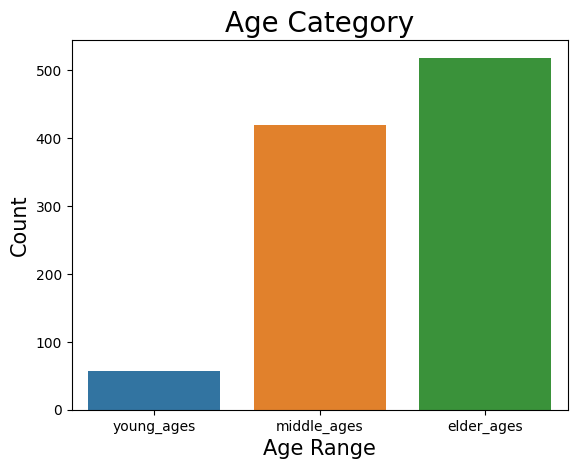

In [13]:
#Bar plot
sns.barplot(x=['young_ages','middle_ages','elder_ages'],y=[len(young_ages),len(middle_ages),len(elder_ages)],palette='tab10')
plt.title('Age Category',fontsize=20)
plt.xlabel('Age Range',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [14]:
#coverting numerical sex values
def gender(row):
    if row==1:
        return "Male"
    elif row==0:
        return "Female"

In [15]:
data['sex']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent


In [16]:
def age_range(row):
    if row>=29 and row<40:
        return "Young Age"
    elif row>=40 and row<55:
        return "Middle Age"
    elif row>55:
        return "Elder Age"
    

In [17]:
data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Age_Range
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,Middle Age
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,Middle Age
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,Elder Age
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,Elder Age
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,Elder Age


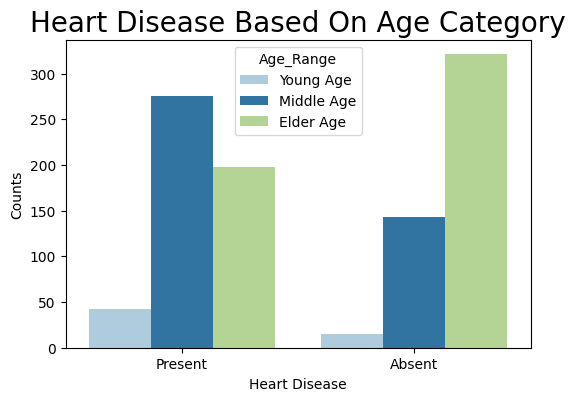

In [18]:
plt.figure(figsize=(6,4))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Present','Absent'], hue_order=hue_order, palette='Paired')
plt.title('Heart Disease Based On Age Category', fontsize=20)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.show()

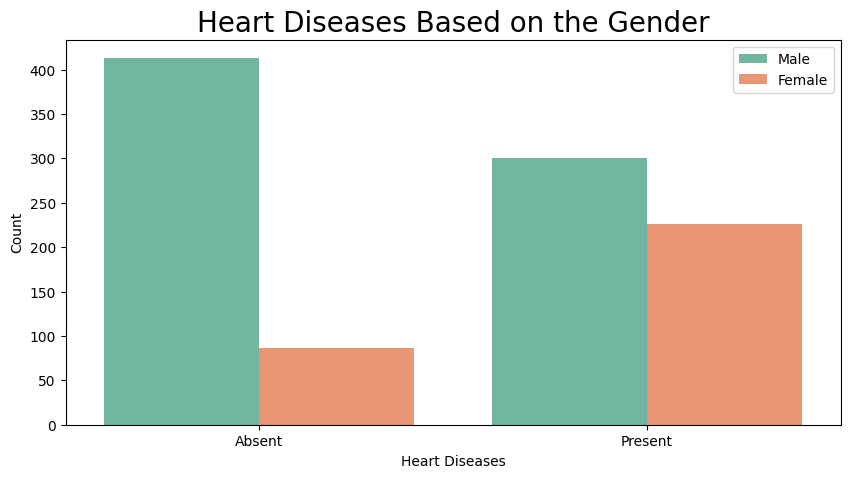

In [19]:
#count plot based on the gender
plt.figure(figsize=(10,5))
sns.countplot(x=data['Heart_Disease'],hue="sex",data=data,palette="Set2")
plt.xlabel('Heart Diseases',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.legend(labels=['Male','Female'])
plt.title("Heart Diseases Based on the Gender",fontsize=20)
plt.show()



<p>--->Males are more prone to Heart Disease

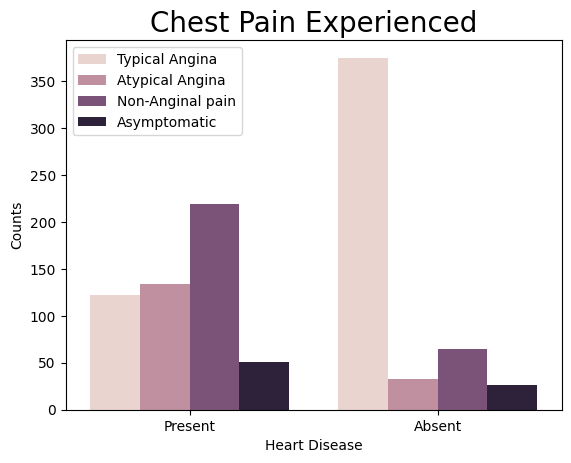

In [20]:
#Count Plot Creation of Chest Pain
sns.countplot(x=data['Heart_Disease'],hue='cp',data=data,order=['Present','Absent'])
plt.title('Chest Pain Experienced', fontsize=20)
plt.xlabel('Heart Disease',fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()


In [21]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Heart_Disease',
       'Age_Range'],
      dtype='object')

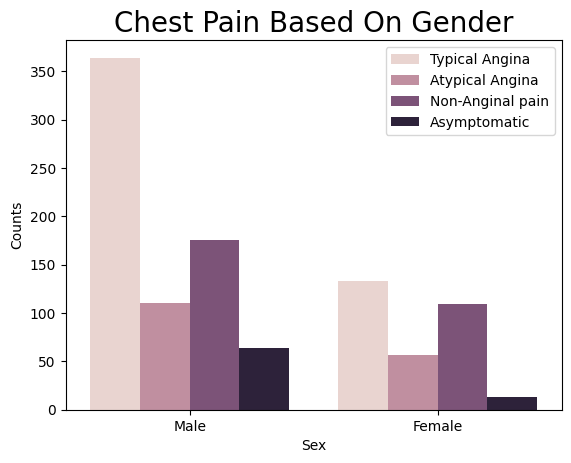

In [22]:
#Count Plot Creation of Chest Pain Based On Gender 
sns.countplot(x=data['sex'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=20)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()


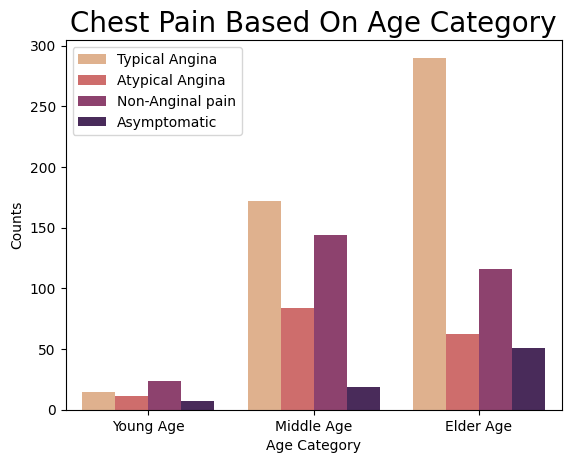

In [23]:
#Count Plot Creation of Chest Pain Based On Age 

sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='flare')
plt.title('Chest Pain Based On Age Category', fontsize=20)
plt.xlabel('Age Category', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

C:\Users\sreen\AppData\Local\Temp\ipykernel_19012\732634292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='fbs', x='sex',legend=False, data=data, palette='viridis')


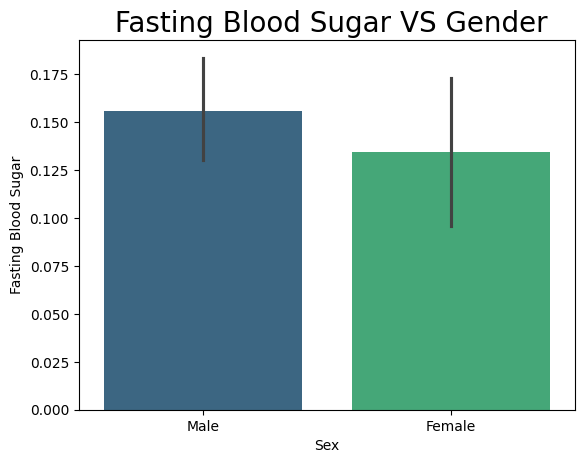

In [24]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender 
sns.barplot(y='fbs', x='sex',legend=False, data=data, palette='viridis')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=20)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Fasting Blood Sugar', fontsize=10)
plt.show()

C:\Users\sreen\AppData\Local\Temp\ipykernel_19012\576170416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='chol', data=data, palette='Blues')


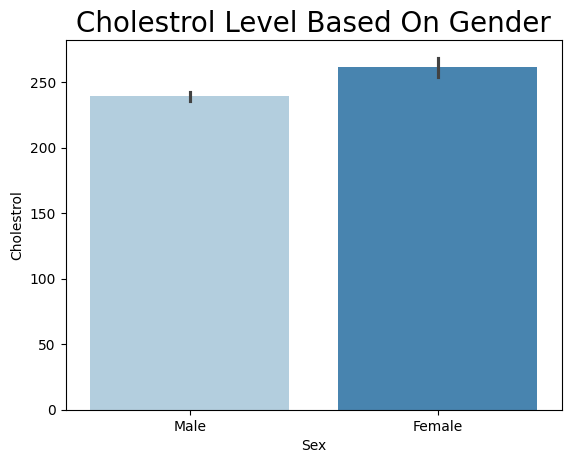

In [25]:
#Bar Plot Creation of Cholestrol Level Based On Gender 
sns.barplot(x='sex', y='chol', data=data, palette='Blues')
plt.title("Cholestrol Level Based On Gender", fontsize=20)
plt.xlabel('Sex',fontsize=10)
plt.ylabel("Cholestrol", fontsize=10)
plt.show()

C:\Users\sreen\AppData\Local\Temp\ipykernel_19012\3389232758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='chol', data=data, palette='YlOrBr')


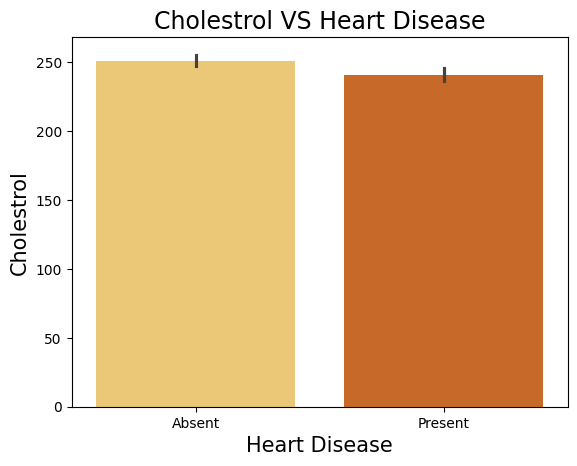

In [26]:
#Bar Plot Creation of Cholestrol VS Heart Disease 
sns.barplot(x='Heart_Disease', y='chol', data=data, palette='YlOrBr')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

C:\Users\sreen\AppData\Local\Temp\ipykernel_19012\2679770397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='icefire')


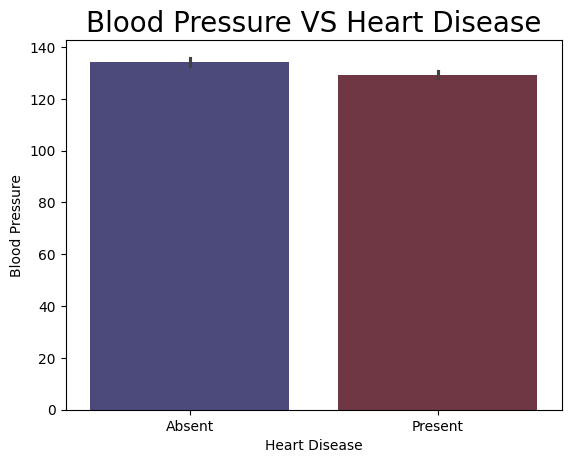

In [27]:
#Bar Plot Creation of Blood Pressure VS Heart Disease 
sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='icefire')
plt.title('Blood Pressure VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Blood Pressure', fontsize=10)
plt.show()

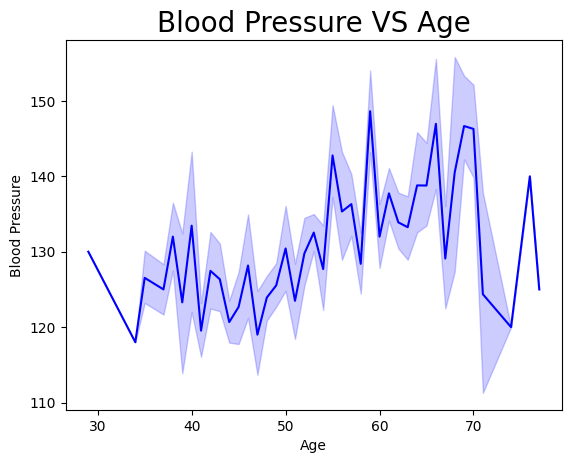

In [28]:
#Line Plot Creation of Blood Pressure VS Age 
sns.lineplot(x='age', y='trestbps', data=data, color='b')
plt.title('Blood Pressure VS Age', fontsize=20)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Blood Pressure', fontsize=10)
plt.show()

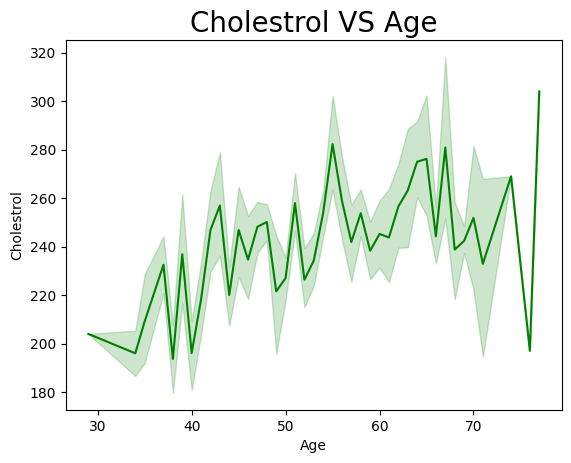

In [29]:
#Line Plot Creation of Cholestrol VS Age using 
sns.lineplot(x='age', y='chol', data=data, color='g')
plt.title('Cholestrol VS Age', fontsize=20)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Cholestrol', fontsize=10)
plt.show()

In [30]:
data.to_csv("new_heart_diseases_diagnostic_data")

<h4>Unified Mentor Data Analytics Internship Project.</h4>
<p>↪Submitted by : S Sreedhar